In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/Colab Notebooks/praktikum_ml/praktikum03"

In [4]:
import pandas as pd

df = pd.read_csv(path + '/data/stunting_wasting_dataset.csv', sep=',')
df.head()

,Jenis Kelamin,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg),Stunting,Wasting
0,Laki-laki,19,91.6,13.3,Tall,Risk of Overweight
1,Laki-laki,20,77.7,8.5,Stunted,Underweight
2,Laki-laki,10,79.0,10.3,Normal,Risk of Overweight
3,Perempuan,2,50.3,8.3,Severely Stunted,Risk of Overweight
4,Perempuan,5,56.4,10.9,Severely Stunted,Risk of Overweight


In [6]:
df.describe()

,Umur (bulan),Tinggi Badan (cm),Berat Badan (kg)
count,100000.000000,100000.000000,100000.000000
mean,11.992580,73.132657,9.259256
std,7.199671,11.360846,3.300780
min,0.000000,42.600000,1.000000
25%,6.000000,65.500000,6.900000
50%,12.000000,74.200000,9.200000
75%,18.000000,81.400000,11.700000
max,24.000000,97.600000,17.200000


In [10]:
df1 = (df[["Berat Badan (kg)", "Jenis Kelamin", "Umur (bulan)", "Tinggi Badan (cm)"]]
       .rename(columns={"Jenis Kelamin":"jk", "Umur (bulan)":"umur_bln",
                        "Tinggi Badan (cm)":"tinggi_cm", "Berat Badan (kg)":"berat_kg"}).copy())

df1["jk"] = df1["jk"].map({"Laki-laki": 1, "Perempuan": 0})
df1.head()

,berat_kg,jk,umur_bln,tinggi_cm
0,13.3,1,19,91.6
1,8.5,1,20,77.7
2,10.3,1,10,79.0
3,8.3,0,2,50.3
4,10.9,0,5,56.4


In [12]:
corr_matrix = df1.corr()

print(corr_matrix)

           berat_kg        jk  umur_bln  tinggi_cm
berat_kg   1.000000  0.045797  0.665389   0.626005
jk         0.045797  1.000000  0.004046   0.073505
umur_bln   0.665389  0.004046  1.000000   0.875869
tinggi_cm  0.626005  0.073505  0.875869   1.000000


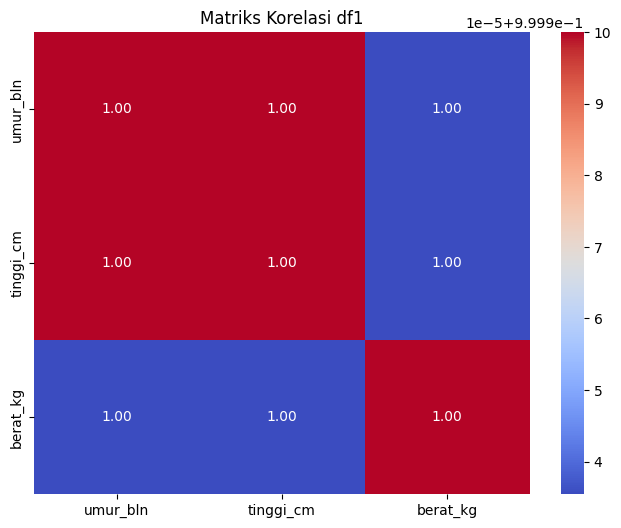

In [13]:
# Import library yang dibutuhkan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh pembuatan DataFrame df1 (ganti dengan data asli jika sudah ada)
data = {
    'umur_bln': [12, 24, 36, 48, 60],
    'tinggi_cm': [75, 85, 95, 105, 115],
    'berat_kg': [9.5, 11.2, 13.0, 14.8, 16.5]
}
df1 = pd.DataFrame(data)

# Hitung matriks korelasi
corr_matrix = df1.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

# Misalkan target (Y) adalah berat badan
y = df1["berat_kg"]  # Variabel dependen

# Fitur (X) adalah umur dan tinggi
X = df1[["umur_bln", "tinggi_cm"]]  # Variabel independen

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state agar hasil konsisten
)

# Cetak jumlah data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

# Tampilkan 5 baris pertama data training
X_train.head()


Jumlah data train : 4
Jumlah data test  : 1


,umur_bln,tinggi_cm
4,60,115
2,36,95
0,12,75
3,48,105


In [19]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Misalkan target (Y) adalah berat badan
y = df1["berat_kg"]  # Variabel dependen

# Fitur (X) adalah umur dan tinggi
X = df1[["umur_bln", "tinggi_cm"]]  # Variabel independen

# Bagi data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # random_state agar hasil konsisten
)

# Cetak jumlah data
print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))

# Tampilkan 5 baris pertama data training
X_train_const = sm.add_constant(X_train)
X_train_const.head()

Jumlah data train : 4
Jumlah data test  : 1


,const,umur_bln,tinggi_cm
4,1.0,60,115
2,1.0,36,95
0,1.0,12,75
3,1.0,48,105


In [22]:
import statsmodels.api as sm

# Tambahkan konstanta ke data training
X_train_const = sm.add_constant(X_train)

# Buat dan latih model OLS
model = sm.OLS(y_train, X_train_const).fit()

# Cetak parameter model
print('------------------------')
print(model.params)
print('------------------------')

# Ambil nilai koefisien
const = model.params['const']
x1_umur = model.params['umur_bln']
x2_tinggi = model.params['tinggi_cm']

# Cetak persamaan regresi
print(f"y = {const:.3f} + ({x1_umur:.3f} * x1) + ({x2_tinggi:.3f} * x2)")


------------------------
const        0.001233
umur_bln     0.046866
tinggi_cm    0.119190
dtype: float64
------------------------
y = 0.001 + (0.047 * x1) + (0.119 * x2)


In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               berat_kg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.142e+04
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           3.18e-05
Time:                        03:18:24   Log-Likelihood:                 9.8344
No. Observations:                   4   AIC:                            -15.67
Df Residuals:                       2   BIC:                            -16.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0012   2.42e-05     50.969      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi berat badan berdasarkan model OLS
y_pred_test = model.predict(X_test_const)

# Buat DataFrame hasil evaluasi
hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

# Hitung selisih error
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

# Hitung akurasi per baris (antisipasi pembagi nol)
denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)
hasil["Akurasi per-baris (%)"] = (1 - hasil["Selisih error (kg)"].abs() / denom).clip(lower=0, upper=1) * 100

# Tampilkan hasil evaluasi
print(hasil)

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)

In [34]:
X_test_const = sm.add_constant(X_test)
y_pred_test = model.predict(X_test_const)

hasil = pd.DataFrame({
    "Umur (bulan)": X_test["umur_bln"].to_numpy(),
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat Aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test
})

hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat Aktual (kg)"]

denom = hasil["Berat Aktual (kg)"].replace(0, np.nan)
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

ValueError: shapes (1,2) and (3,) not aligned: 2 (dim 1) != 3 (dim 0)